# Over- und Underfitting
## Overfitting
- Beim Overfitting ist das Modell zu gut an den Trainingssatz angepasst und liefert schlechte Performance für Predictions. Einzelne Datenpunkte (z.B. Ausreißer) werden zu stark mit einbezogen.
- Die Trainingsgenauigkeit ist sehr gut, die Testgenauigkeit sehr schlecht. 
- Erkennbar an ansteigender Trainingsperformance und gleichzeitig abfallender Testgenauigkeit.

## Underfitting
- Das Modell ist zu einfach und erkennt die Komplexität der Daten nicht


## Over- und Underfitting bei der Regression

In [6]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [7]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

degrees = [1, 2, 3, 4, 15, 20, 30]

X = np.arange(start=-0.75, stop=0.75, step=0.02)
y_true = true_fun(X)
y = y_true + np.random.normal(loc=0.0, scale=2.0, size=len(X)) * 0.1

X = np.reshape(X, newshape=(-1, 1))

In [8]:
print(f"x shape: {X.shape}")
print(f"y shape: {y.shape}")

x shape: (75, 1)
y shape: (75,)


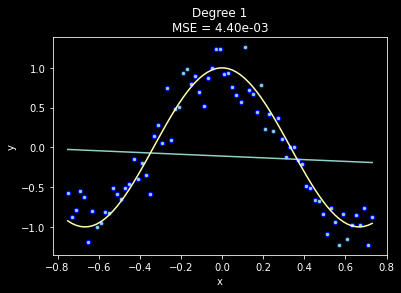

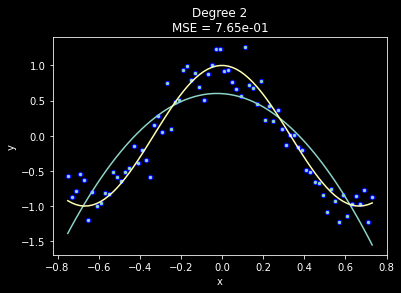

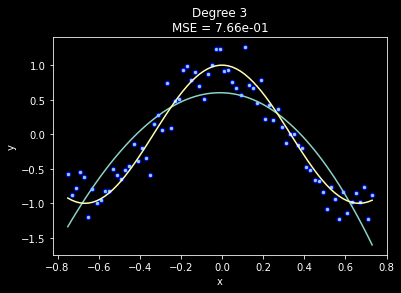

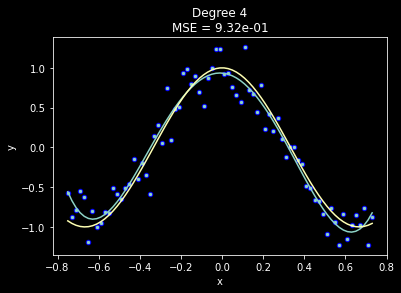

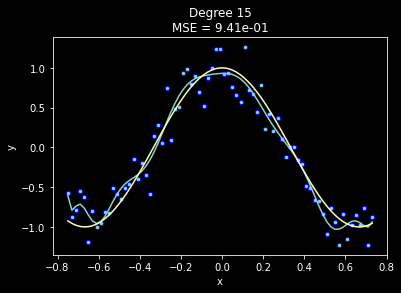

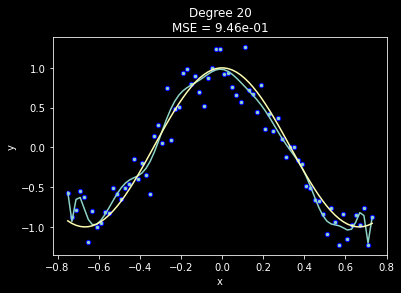

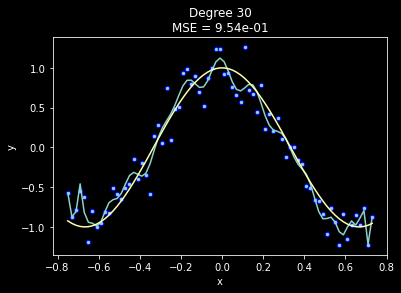

In [9]:
for i in range(len(degrees)):
    fig, ax = plt.subplots()

    polynomial_features = PolynomialFeatures(
        degree=degrees[i]
    )
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    pipeline.fit(X, y)
    score = pipeline.score(X, y)
    y_pred = pipeline.predict(X)

    plt.plot(X, y_pred, label="Model")
    plt.plot(X, y_true, label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Degree {degrees[i]}\nMSE = {score:.2e}")
    plt.show()

Over- und Underfitting bei der Klassifikation

In [10]:
import numpy as np
np.random.seed(0)

from typing import Any
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [11]:
cmap_background = ListedColormap(
    colors=['#FFAAAA', '#AAAAFF', '#AAFFAA'
])

cmap_points = [
    'red',
    'blue',
    'green'
]

def make_meshgrid(
    x0: np.ndarray,
    x1: np.ndarray
) -> np.ndarray:
    step_width = 0.25
    offset = 0.1
    x0a = np.arange(np.min(x0) - offset, np.max(x0) + offset, step_width)
    x1a = np.arange(np.min(x1) - offset, np.max(x1) + offset, step_width)
    xx0, xx1 = np.meshgrid(x0a, x1a)
    return xx0, xx1

def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    xx0: np.ndarray,
    xx1: np.ndarray,
    **params: Any
):
    x_combinations = np.vstack([xx0.flatten(), xx1.flatten()]).T
    z = clf.predict(x_combinations)
    z = np.reshape(z, newshape=(xx0.shape))
    ax.contourf(xx0, xx1, z, **params)

def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
) -> None:
    fig, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx0, xx1 = make_meshgrid(X0, X1)
    plot_contours(
        ax, clf, xx0, xx1, cmap=cmap_background, alpha=0.5
    )
    for idx, point in enumerate(x_train):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_train[idx]],
            s=15.0,
            marker="o"
        )
    for idx, point in enumerate(x_test):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_test[idx]],
            s=40.0,
            marker="*"
        )
    plt.xlim([8.0, 22.0])
    plt.ylim([10.0, 30.0])
    plt.show()

In [12]:
dataset = load_breast_cancer()

x = dataset.data[:, [0, 1]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[1-NN] train acc: 1.0 test acc: 0.8187134502923976


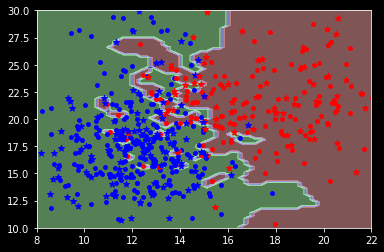

[3-NN] train acc: 0.9321608040201005 test acc: 0.8421052631578947


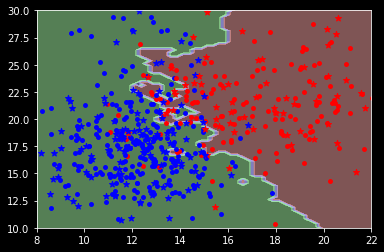

[5-NN] train acc: 0.9246231155778895 test acc: 0.8771929824561403


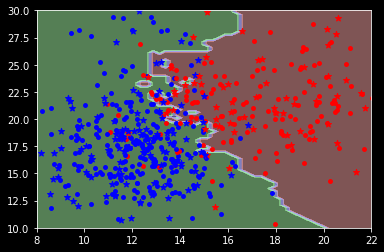

[7-NN] train acc: 0.914572864321608 test acc: 0.8888888888888888


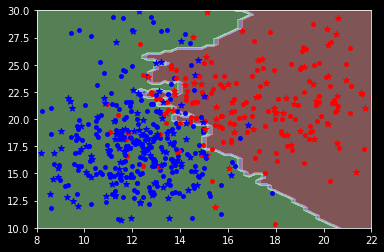

[9-NN] train acc: 0.9020100502512562 test acc: 0.9064327485380117


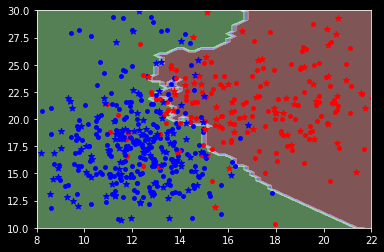

[19-NN] train acc: 0.9045226130653267 test acc: 0.9064327485380117


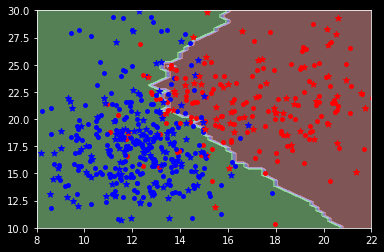

[29-NN] train acc: 0.8944723618090452 test acc: 0.9239766081871345


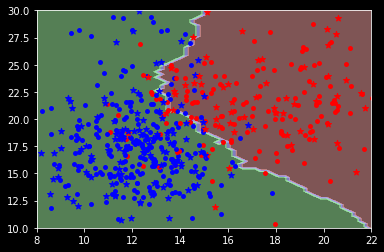

[49-NN] train acc: 0.9020100502512562 test acc: 0.9181286549707602


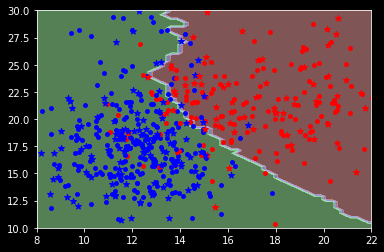

[59-NN] train acc: 0.8969849246231156 test acc: 0.9122807017543859


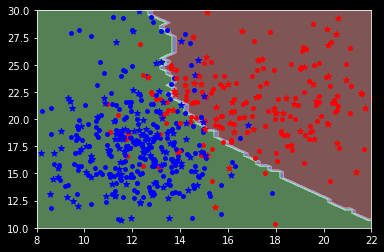

[79-NN] train acc: 0.8844221105527639 test acc: 0.9064327485380117


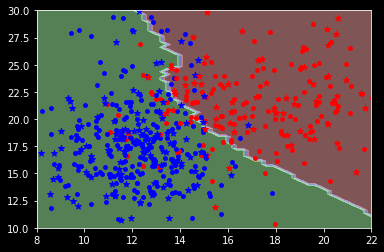

[99-NN] train acc: 0.8819095477386935 test acc: 0.9064327485380117


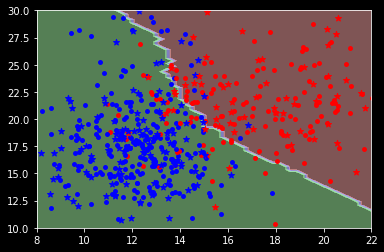

In [13]:
ks = [1, 3, 5, 7, 9, 19, 29, 49, 59, 79, 99]

for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    print(f"[{k}-NN] train acc: {train_score} test acc: {test_score}")
    clf.fit(x_train, y_train)
    plot_decision_border(clf, x_train[:500], y_train[:500], x_test[:200], y_test[:200])